In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/webis-clickbait-22/test.jsonl
/kaggle/input/webis-clickbait-22/validation.jsonl
/kaggle/input/webis-clickbait-22/train.jsonl


In [2]:
from matplotlib import pyplot as plt

In [3]:
data=pd.read_json("/kaggle/input/webis-clickbait-22/train.jsonl",lines=True)
data

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","[http://pixel.wp.com/b.gif?v=noscript, http://...",http://nesn.com/2016/09/wes-welker-wanted-dinn...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[how about that morning we go throw?],"[[[3, 151], [3, 186]]]",[passage]
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cH672Z,"{'source': 'anonymized', 'humanSpoiler': '2070...",[2070],"[[[0, 0], [0, 4]]]",[phrase]
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,[This is what makes employees happy -- and it'...,Twitter,"[Despite common belief, money isn't the key to...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",[http://i.huffpost.com/gen/1359674/images/o-HA...,http://huff.to/1epfeaw,"{'source': 'anonymized', 'humanSpoiler': 'Inte...",[intellectual stimulation],"[[[1, 186], [1, 210]]]",[phrase]
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",[multi]
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,[The perfect way to cook rice so that it's per...,Twitter,"[Boiling rice may seem simple, but there is a ...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[in a rice cooker],"[[[5, 60], [5, 76]]]",[phrase]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,92578045-699f-4957-a3c5-cff2c3874dae,591979258442027008,[Has Facebook's video explosion completely sha...,Twitter,"[A long time ago in a galaxy far, far away...W...","Facebook Video Surging, But YouTube Still Offe...",.,"Facebook,web video,web video ads,YouTube",[http://djcs-prod.s3.amazonaws.com/wsjfrontpag...,http://on.wsj.com/1GfyUqz,"{'source': 'anonymized', 'humanSpoiler': 'No.'...",[it hasn’t necessarily taken the wind out of Y...,"[[[7, 50], [7, 118]]]",[passage]
3196,51682121-df0b-4289-a95f-e1bc3d181306,881531941974661_902284433232745,[Cop Is Eating At A Chili's When Teen Hands Hi...,Facebook,"[The Kansas City, Kansas Police Department are...",Cop is eating at Chili's when teen hands him f...,None,None,[https://sbly-web-prod-shareably.netdna-ssl.co...,http://shareably.net/officer-receives-touching...,"{'source': 'anonymized', 'humanSpoiler': 'The ...","[It read, ""Thanks for keeping us safe.""]","[[[0, 317], [0, 355]]]",[passage]
3197,9c45ca67-38c4-47b4-aa0d-48434bae09fc,837356193576333314,[5 popular myths about visible signs of aging ...,Twitter,"[Obama looks decades younger already, but what...",5 popular myths about visible signs of aging t...,Dozens of anti-wrinkle products and creams are...,,None,https://www.businessinsider.in/5-popular-myths...,"{'source': 'anonymized', 'humanSpoiler': None,...",[1. Anti-wrinkle creams will er

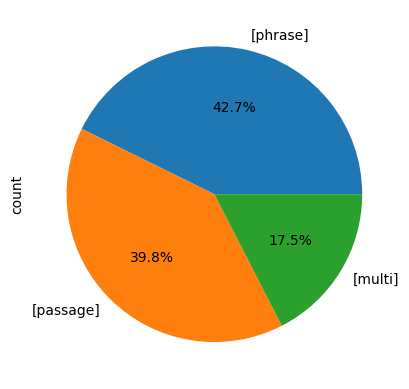

In [4]:
column = data['tags']

# Get the value counts of each unique value in the column
value_counts = column.value_counts()

# Plot a pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()

Average content length

In [5]:
def get_lengths(sentence):
    return len(sentence[0])
    

In [6]:
def get_list_lengths(l):
    return len(l)

In [7]:
def get_target(l):
    return len(' '.join(l))

In [8]:
post_lengths=data['postText'].apply(get_lengths)
print("average post length",post_lengths.mean())

average post length 61.935


In [9]:
target_lengths=data['targetParagraphs'].apply(get_list_lengths)
print("average number of target paragraphs",target_lengths.mean())

average number of target paragraphs 14.195625


In [10]:
total_target_lengths=data['targetParagraphs'].apply(get_target)
print("average total target paragraphs length",total_target_lengths.mean())

average total target paragraphs length 3022.9740625


In [ ]:
total_target_length=total_target_lengths.to_frame(name="total_target_length")

In [11]:
tags=data['tags'].apply(lambda x: x[0])
tags

0       passage
1        phrase
2        phrase
3         multi
4        phrase
         ...   
3195    passage
3196    passage
3197      multi
3198     phrase
3199     phrase
Name: tags, Length: 3200, dtype: object

In [12]:
data2=pd.concat([tags,post_lengths,target_lengths,total_target_length],axis=1)
print(data2)
x1=data2.groupby(['tags'],axis=0).mean()
x1

         tags  postText  targetParagraphs  targetParagraphs
0     passage        72                 7              1669
1      phrase        46                10              2105
2      phrase        65                10              1775
3       multi        53                50             11147
4      phrase        86                20              2523
...       ...       ...               ...               ...
3195  passage        66                18              4206
3196  passage        98                 3              1636
3197    multi        59                27              4449
3198   phrase        71                25              2000
3199   phrase        42                 7              1107

[3200 rows x 4 columns]


/tmp/ipykernel_629/1580666397.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  x1=data2.groupby(['tags'],axis=0).mean()


,postText,targetParagraphs,targetParagraphs
tags,,,
multi,62.992844,22.940966,4404.159213
passage,61.163265,13.143642,2993.544741
phrase,62.221653,11.599854,2485.600585


In [13]:
x2=data2.groupby(['tags'],axis=0).min()
x2

/tmp/ipykernel_629/3351395187.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  x2=data2.groupby(['tags'],axis=0).min()


,postText,targetParagraphs,targetParagraphs
tags,,,
multi,13,1,198
passage,8,1,55
phrase,12,1,39


In [14]:
x3=data2.groupby(['tags'],axis=0).max()
x3

/tmp/ipykernel_629/4275582801.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  x3=data2.groupby(['tags'],axis=0).max()


,postText,targetParagraphs,targetParagraphs
tags,,,
multi,158,249,67466
passage,132,108,99993
phrase,135,198,45468


Similarity scores

In [15]:
phrase=data2[data2['tags']=='phrase']
passage=data2[data2['tags']=='passage']
multi=data2[data2['tags']=='multi']
phrase

,tags,postText,targetParagraphs,targetParagraphs
1,phrase,46,10,2105
2,phrase,65,10,1775
4,phrase,86,20,2523
10,phrase,62,12,3173
11,phrase,88,4,889
...,...,...,...,...
3178,phrase,89,26,7634
3179,phrase,72,10,4662
3183,phrase,58,7,1331
3198,phrase,71,25,2000


In [16]:
passage

,tags,postText,targetParagraphs,targetParagraphs
0,passage,72,7,1669
5,passage,76,7,1090
6,passage,55,7,1089
7,passage,84,2,331
8,passage,26,8,3054
...,...,...,...,...
3189,passage,57,9,1238
3193,passage,52,10,2303
3194,passage,79,8,1777
3195,passage,66,18,4206


In [17]:
multi

,tags,postText,targetParagraphs,targetParagraphs
3,multi,53,50,11147
9,multi,54,37,3864
20,multi,50,8,1580
43,multi,52,12,3686
44,multi,65,53,6656
...,...,...,...,...
3188,multi,56,4,1313
3190,multi,86,8,2165
3191,multi,32,17,2177
3192,multi,66,28,1556


Target Media Length

In [18]:
def get_list_length(lst):
    if lst == None:
        return 0
    return len(lst)

In [19]:
data["targetMedia_length"] = data["targetMedia"].apply(get_list_length)
target_media_length=data['targetMedia_length']
data.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags,targetMedia_length
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","[http://pixel.wp.com/b.gif?v=noscript, http://...",http://nesn.com/2016/09/wes-welker-wanted-dinn...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[how about that morning we go throw?],"[[[3, 151], [3, 186]]]",[passage],18
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cH672Z,"{'source': 'anonymized', 'humanSpoiler': '2070...",[2070],"[[[0, 0], [0, 4]]]",[phrase],10
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,[This is what makes employees happy -- and it'...,Twitter,"[Despite common belief, money isn't the key to...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",[http://i.huffpost.com/gen/1359674/images/o-HA...,http://huff.to/1epfeaw,"{'source': 'anonymized', 'humanSpoiler': 'Inte...",[intellectual stimulation],"[[[1, 186], [1, 210]]]",[phrase],10
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",[multi],0
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,[The perfect way to cook rice so that it's per...,Twitter,"[Boiling rice may seem simple, but there is a ...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[in a rice cooker],"[[[5, 60], [5, 76]]]",[phrase],0


In [20]:
filtered_df_train = data[(data['targetMedia_length'] == 0)]

In [21]:
df_list_train = filtered_df_train.values.tolist()

In [22]:
def get_tag_count(lst):
    multi_none = 0
    passage_none = 0
    phrase_none = 0
    for i in lst:
        if i[-2][0] == 'multi':
            multi_none+=1
        elif i[-2][0] == 'phrase':
            phrase_none+=1
        elif i[-2][0] == 'passage':
            passage_none+=1
            
    return multi_none,phrase_none,passage_none

In [23]:
multi_none_train, passage_none_train, phrase_none_train  = get_tag_count(df_list_train)

In [24]:
print(multi_none_train,passage_none_train,phrase_none_train)

218 104 193


In [25]:

# total_target_length['total_target_length']=total_target_lengths
data2=pd.concat([post_lengths,target_lengths,total_target_length,target_media_length,tags],axis=1)
data2

,postText,targetParagraphs,total_target_length,targetMedia_length,tags
0,72,7,1669,18,passage
1,46,10,2105,10,phrase
2,65,10,1775,10,phrase
3,53,50,11147,0,multi
4,86,20,2523,0,phrase
...,...,...,...,...,...
3195,66,18,4206,11,passage
3196,98,3,1636,23,passage
3197,59,27,4449,0,multi
3198,71,25,2000,0,phrase


In [27]:
pivot_table = data2.pivot_table(index='tags')

<Axes: ylabel='tags'>

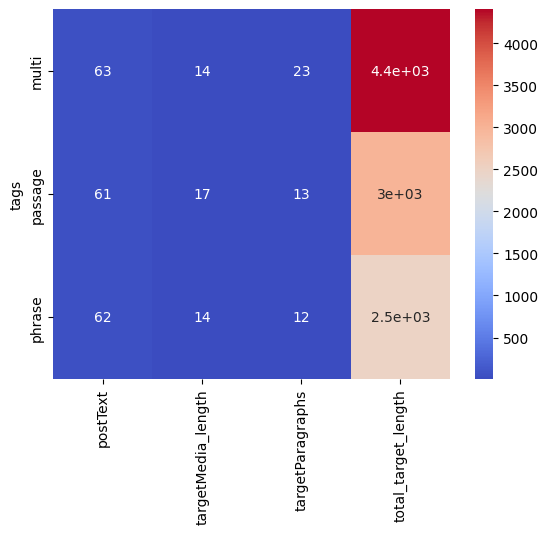

In [28]:
import seaborn as sns
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')